In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('aq_filled.csv', parse_dates=[0], index_col=0)
pollutants = df[['NOx (ppb)','O3 (ppb)']]

In [67]:
scaler = MinMaxScaler()
pollutants_scaled = pollutants.copy()
pollutants_scaled[:] = scaler.fit_transform(pollutants)

In [68]:
inertias = []
for k in range(2,9):
    kmeans = KMeans(k)
    kmeans.fit(pollutants_scaled)
    inertias.append(kmeans.inertia_)

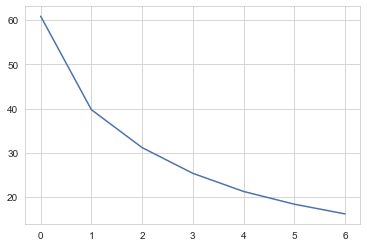

In [69]:
plt.plot(inertias)
plt.show()

In [70]:
kmeans = KMeans(2)
kmeans.fit(pollutants_scaled)

KMeans(n_clusters=2)

In [71]:
df_clustered = df.copy()
df_clustered['cluster'] = kmeans.labels_

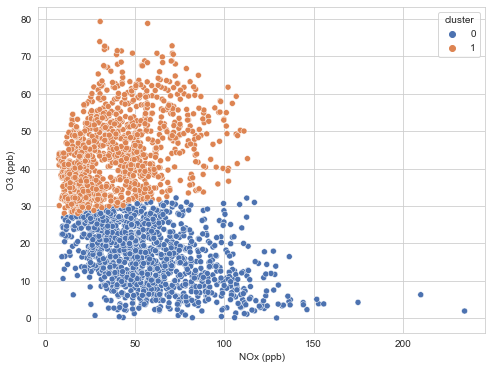

In [72]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_clustered['NOx (ppb)'], y=df_clustered['O3 (ppb)'], hue=df_clustered['cluster'])
plt.show()

In [73]:
profiles = round(df_clustered.drop(columns=['Temp (C)','Humidity (%)']),0)
profiles

,NOx (ppb),O3 (ppb),cluster
Datetime,,,
2022-04-09 12:00:00,19.0,31.0,1
2022-04-09 13:00:00,21.0,30.0,1
2022-04-09 14:00:00,21.0,28.0,0
2022-04-09 15:00:00,22.0,29.0,1
2022-04-09 16:00:00,25.0,27.0,0
...,...,...,...
2022-07-18 20:00:00,65.0,34.0,1
2022-07-18 21:00:00,66.0,28.0,0
2022-07-18 22:00:00,66.0,30.0,0


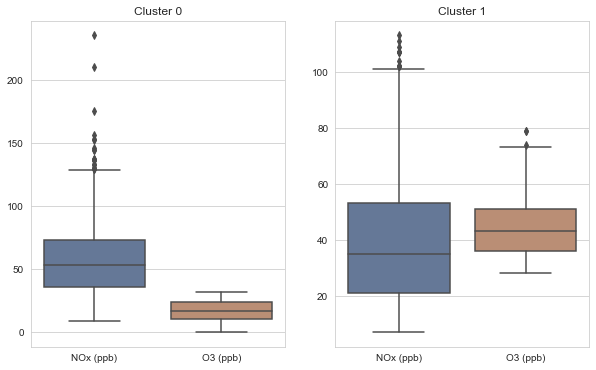

In [74]:
sns.set_style('whitegrid')
sns.set_palette("deep")
fig, ax = plt.subplots(1,2, figsize=(10,6))

sns.boxplot(data=profiles.loc[profiles['cluster']==0].drop(columns='cluster'), ax=ax[0], saturation=.5)
sns.boxplot(data=profiles.loc[profiles['cluster']==1].drop(columns='cluster'), ax=ax[1], saturation=.5)

ax[0].set_title('Cluster 0')
ax[1].set_title('Cluster 1')

plt.show()

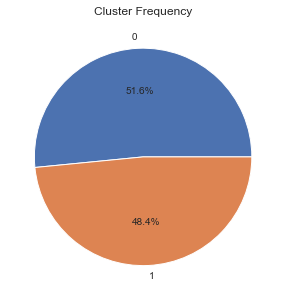

In [75]:
sns.set_palette("deep")
df_clustered['cluster'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(5,5))
plt.title('Cluster Frequency')
plt.ylabel("")
plt.show()